### Reading and Understanding the Data
Let's start with the following steps:

1 Importing data using the pandas library

2 Understanding the structure of the data

In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [32]:
telecom = pd.read_csv("C:\\Users\\DELL\\Desktop\\TelecomChurnCaseStudy\\train.csv")

In [33]:
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [36]:
telecom.shape

(69999, 172)

In [37]:
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [38]:
# Check for duplicate data
dups = telecom.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
telecom[dups]

Number of duplicate rows = 0


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


### Pre-processing the Training Data

In [41]:
telecom.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [43]:
null_perc = (telecom.isnull().sum() / telecom.isnull().count()*100).sort_values(ascending = False)
null_perc.head(30)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

In [52]:
#droping the column with high missing data 
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)

#List the columns having more than 30% missing values
list_missing_30 = list(telecom_missing_columns.index[telecom_missing_columns['null'] > 30])

# Delete the columns having more than 30% missing values
telecom = telecom.drop(list_missing_30, axis=1)

In [53]:
telecom.shape

(69999, 142)

In [54]:
null_perc = (telecom.isnull().sum() / telecom.isnull().count()*100).sort_values(ascending = False)
null_perc.head(30)

roam_og_mou_8       5.290076
og_others_8         5.290076
spl_og_mou_8        5.290076
loc_ic_t2t_mou_8    5.290076
loc_og_t2m_mou_8    5.290076
loc_og_t2c_mou_8    5.290076
loc_ic_t2m_mou_8    5.290076
loc_og_t2t_mou_8    5.290076
loc_ic_t2f_mou_8    5.290076
std_og_t2f_mou_8    5.290076
loc_ic_mou_8        5.290076
isd_og_mou_8        5.290076
roam_ic_mou_8       5.290076
std_ic_t2t_mou_8    5.290076
loc_og_mou_8        5.290076
offnet_mou_8        5.290076
std_ic_t2m_mou_8    5.290076
onnet_mou_8         5.290076
std_ic_t2f_mou_8    5.290076
std_og_mou_8        5.290076
std_ic_t2o_mou_8    5.290076
std_og_t2t_mou_8    5.290076
std_ic_mou_8        5.290076
spl_ic_mou_8        5.290076
std_og_t2c_mou_8    5.290076
isd_ic_mou_8        5.290076
std_og_t2m_mou_8    5.290076
ic_others_8         5.290076
loc_og_t2f_mou_8    5.290076
isd_og_mou_6        3.954342
dtype: float64

We will be Deleting the Date columns as they are not important in our analysis

In [55]:
# List the date columns
date_cols = [j for j in telecom.columns.to_list() if 'date' in j]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [57]:
# Delete the date columns
telecom = telecom.drop(date_cols, axis=1)

In [58]:
# Dropping circle_id column as there will be no impact of this column on the data analysis.
telecom = telecom.drop('circle_id', axis=1)

In [59]:
telecom.shape

(69999, 135)

### Filter High Value Customers

In [63]:
telecom['avg_rech_amt_6_7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [66]:
Pre_70 = telecom['avg_rech_amt_6_7'].quantile(0.7)
Pre_70

370.0

In [68]:
telecom = telecom[telecom['avg_rech_amt_6_7'] >= Pre_70]
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


In [69]:
telecom.shape

(21018, 136)

In [75]:
# Checking the missing values in columns again
df_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_mou_8,3.12
std_ic_t2m_mou_8,3.12
std_ic_t2o_mou_8,3.12
std_og_mou_8,3.12
loc_og_t2f_mou_8,3.12
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


MOU for all the types of calls for the month of August ( _8) have missing values together for any particular record.

Lets check the records for the MOU for Aug( _8), in which these coulmns have missing values together.

In [76]:
# Listing the columns of MOU Aug( _8)
print(((df_missing_columns[df_missing_columns['null'] == 3.12]).index).to_list())

['std_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'isd_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'roam_og_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8', 'og_others_8', 'std_og_t2t_mou_8', 'offnet_mou_8', 'spl_ic_mou_8', 'loc_ic_mou_8', 'onnet_mou_8', 'loc_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'isd_ic_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'ic_others_8', 'loc_og_t2c_mou_8']


In [78]:
# Creating a dataframe with the condition, in which MOU for Aug(_8) are null
df_null_mou_8 = telecom[(telecom['std_ic_mou_8'].isnull()) & (telecom['std_ic_t2m_mou_8'].isnull()) & (telecom['std_ic_t2o_mou_8'].isnull()) & (telecom['std_og_mou_8'].isnull()) &
  (telecom['loc_og_t2f_mou_8'].isnull()) & (telecom['isd_og_mou_8'].isnull()) & (telecom['loc_og_t2m_mou_8'].isnull()) & (telecom['loc_og_mou_8'].isnull()) &
  (telecom['loc_ic_t2f_mou_8'].isnull()) & (telecom['loc_og_t2t_mou_8'].isnull()) & (telecom['std_og_t2f_mou_8'].isnull()) & (telecom['spl_og_mou_8'].isnull()) &
  (telecom['roam_og_mou_8'].isnull()) & (telecom['std_og_t2c_mou_8'].isnull()) & (telecom['std_ic_t2t_mou_8'].isnull()) & (telecom['roam_ic_mou_8'].isnull()) & 
  (telecom['og_others_8'].isnull()) & (telecom['std_og_t2t_mou_8'].isnull()) & (telecom['offnet_mou_8'].isnull()) & (telecom['spl_ic_mou_8'].isnull()) & 
  (telecom['loc_ic_mou_8'].isnull()) & (telecom['onnet_mou_8'].isnull()) & (telecom['loc_ic_t2t_mou_8'].isnull()) & (telecom['std_ic_t2f_mou_8'].isnull()) & 
  (telecom['isd_ic_mou_8'].isnull()) & (telecom['std_og_t2m_mou_8'].isnull()) & (telecom['loc_ic_t2m_mou_8'].isnull()) & (telecom['ic_others_8'].isnull()) & 
  (telecom['loc_og_t2c_mou_8'].isnull())]

df_null_mou_8.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
177,177,0.0,0.0,0.0,596.301,146.073,0.0,55.19,3.26,NaN,...,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,183,0.0,0.0,0.0,263.340,806.465,0.0,211.89,119.89,NaN,...,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,491,0.0,0.0,0.0,1748.607,1172.416,0.0,3709.38,2343.29,NaN,...,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,597,0.0,0.0,0.0,578.568,141.341,0.0,236.08,103.83,NaN,...,0,0,0,0,227,0.0,0.0,0.00,1,375.0
664,664,0.0,0.0,0.0,475.536,137.251,0.0,25.26,11.58,NaN,...,0,0,0,0,499,0.0,0.0,0.00,1,385.0


In [79]:
df_null_mou_8.shape

(655, 136)

In [84]:
# Deleting the records for which MOU for Aug(_8) are null
telecom = telecom.drop(df_null_mou_8.index)

In [85]:
telecom.shape

(20363, 136)

In [86]:
# Checking the missing values in columns again
df_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_ic_mou_6,0.62
loc_og_mou_6,0.62
loc_ic_mou_6,0.62
loc_ic_t2f_mou_6,0.62
loc_og_t2f_mou_6,0.62
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


In [89]:
# Listing the columns of MOU June( _6)
print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['isd_ic_mou_6', 'loc_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6']


In [90]:
# Creating a dataframe with the condition, in which MOU for June( _6) are null
df_null_mou_6 = telecom[(telecom['std_ic_mou_6'].isnull()) & (telecom['std_ic_t2m_mou_6'].isnull()) & (telecom['std_ic_t2o_mou_6'].isnull()) & (telecom['std_og_mou_6'].isnull()) &
  (telecom['loc_og_t2f_mou_6'].isnull()) & (telecom['isd_og_mou_6'].isnull()) & (telecom['loc_og_t2m_mou_6'].isnull()) & (telecom['loc_og_mou_6'].isnull()) &
  (telecom['loc_ic_t2f_mou_6'].isnull()) & (telecom['loc_og_t2t_mou_6'].isnull()) & (telecom['std_og_t2f_mou_6'].isnull()) & (telecom['spl_og_mou_6'].isnull()) &
  (telecom['roam_og_mou_6'].isnull()) & (telecom['std_og_t2c_mou_6'].isnull()) & (telecom['std_ic_t2t_mou_6'].isnull()) & (telecom['roam_ic_mou_6'].isnull()) & 
  (telecom['og_others_6'].isnull()) & (telecom['std_og_t2t_mou_6'].isnull()) & (telecom['offnet_mou_6'].isnull()) & (telecom['spl_ic_mou_6'].isnull()) & 
  (telecom['loc_ic_mou_6'].isnull()) & (telecom['onnet_mou_6'].isnull()) & (telecom['loc_ic_t2t_mou_6'].isnull()) & (telecom['std_ic_t2f_mou_6'].isnull()) & 
  (telecom['isd_ic_mou_6'].isnull()) & (telecom['std_og_t2m_mou_6'].isnull()) & (telecom['loc_ic_t2m_mou_6'].isnull()) & (telecom['ic_others_6'].isnull()) & 
  (telecom['loc_og_t2c_mou_6'].isnull())]

df_null_mou_6.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
599,599,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,0.00,...,1,0,0,0,451,0.0,0.00,0.00,0,855.0
2248,2248,0.0,0.0,0.0,387.414,386.494,774.756,NaN,NaN,0.00,...,2,0,0,0,445,0.0,0.00,0.00,0,455.0
2393,2393,0.0,0.0,0.0,0.040,673.807,796.780,NaN,65.29,56.19,...,0,0,0,0,479,0.0,0.00,0.00,0,402.5
2754,2754,0.0,0.0,0.0,0.000,492.442,575.801,NaN,396.01,449.61,...,0,0,0,0,2719,0.0,0.00,0.00,0,408.5
3487,3487,0.0,0.0,0.0,266.914,722.042,1078.905,NaN,NaN,0.00,...,4,0,0,0,517,3011.4,458.66,729.82,0,503.0


In [91]:
df_null_mou_6.shape

(126, 136)

In [92]:
# Deleting the records for which MOU for June(_6) are null
telecom = telecom.drop(df_null_mou_6.index)

In [93]:
telecom.shape

(20237, 136)

In [94]:
# Checking the missing values in columns again
df_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.15
ic_others_7,0.15
loc_og_t2c_mou_7,0.15
loc_og_mou_7,0.15
std_og_t2t_mou_7,0.15
...,...
std_og_mou_8,0.00
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_6,0.00


In [95]:
# Listing the columns of MOU July( _7)
print(((df_missing_columns[df_missing_columns['null'] == 0.15]).index).to_list())

['loc_ic_t2f_mou_7', 'ic_others_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_og_t2m_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_7', 'onnet_mou_7', 'roam_og_mou_7']


In [96]:
# Creating a dataframe with the condition, in which MOU for July( _7) are null
df_null_mou_7 = telecom[(telecom['std_ic_mou_7'].isnull()) & (telecom['std_ic_t2m_mou_7'].isnull()) & (telecom['std_ic_t2o_mou_7'].isnull()) & (telecom['std_og_mou_7'].isnull()) &
  (telecom['loc_og_t2f_mou_7'].isnull()) & (telecom['isd_og_mou_7'].isnull()) & (telecom['loc_og_t2m_mou_7'].isnull()) & (telecom['loc_og_mou_7'].isnull()) &
  (telecom['loc_ic_t2f_mou_7'].isnull()) & (telecom['loc_og_t2t_mou_7'].isnull()) & (telecom['std_og_t2f_mou_7'].isnull()) & (telecom['spl_og_mou_7'].isnull()) &
  (telecom['roam_og_mou_7'].isnull()) & (telecom['std_og_t2c_mou_7'].isnull()) & (telecom['std_ic_t2t_mou_7'].isnull()) & (telecom['roam_ic_mou_7'].isnull()) & 
  (telecom['og_others_7'].isnull()) & (telecom['std_og_t2t_mou_7'].isnull()) & (telecom['offnet_mou_7'].isnull()) & (telecom['spl_ic_mou_7'].isnull()) & 
  (telecom['loc_ic_mou_7'].isnull()) & (telecom['onnet_mou_7'].isnull()) & (telecom['loc_ic_t2t_mou_7'].isnull()) & (telecom['std_ic_t2f_mou_7'].isnull()) & 
  (telecom['isd_ic_mou_7'].isnull()) & (telecom['std_og_t2m_mou_7'].isnull()) & (telecom['loc_ic_t2m_mou_7'].isnull()) & (telecom['ic_others_7'].isnull()) & 
  (telecom['loc_og_t2c_mou_7'].isnull())]

df_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
1054,1054,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,90.56,...,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,1404,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,39.13,...,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,1641,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,80.71,...,0,0,0,0,3370,0.00,0.00,0.00,0,375.0
10706,10706,0.0,0.0,0.0,972.338,0.000,100.618,990.83,NaN,14.38,...,0,0,0,0,181,0.00,0.00,0.00,1,543.0
12755,12755,0.0,0.0,0.0,747.552,0.210,611.178,1800.23,NaN,1167.46,...,0,0,0,0,327,0.00,0.00,0.00,0,420.0


In [97]:
df_null_mou_7.shape

(31, 136)

In [98]:
# Deleting the records for which MOU for July(_7) are null
telecom = telecom.drop(df_null_mou_7.index)

In [99]:
telecom.shape

(20206, 136)

In [100]:
# Checking the missing values in columns again
df_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


So finally we see that we have lost all the rows with missing values from the training data

In [116]:
telecom.shape

(20206, 136)

In [117]:
telecom.dtypes

id                     int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
arpu_6               float64
                      ...   
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
avg_rech_amt_6_7     float64
Length: 136, dtype: object

In [127]:
# change data type to category
telecom.churn_probability = telecom.churn_probability.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom.churn_probability.value_counts()*100/telecom.shape[0])

Churn Ratio:
0    93.610809
1     6.389191
Name: churn_probability, dtype: float64


### Pre-processing the Test Data

In [28]:
test = pd.read_csv("C:\\Users\\DELL\\Desktop\\TelecomChurnCaseStudy\\test.csv")

In [29]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [44]:
null_perc = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
null_perc.head(30)

arpu_3g_6                   74.716667
count_rech_3g_6             74.716667
fb_user_6                   74.716667
night_pck_user_6            74.716667
total_rech_data_6           74.716667
max_rech_data_6             74.716667
count_rech_2g_6             74.716667
date_of_last_rech_data_6    74.716667
av_rech_amt_data_6          74.716667
arpu_2g_6                   74.716667
night_pck_user_7            74.313333
arpu_2g_7                   74.313333
fb_user_7                   74.313333
arpu_3g_7                   74.313333
count_rech_2g_7             74.313333
av_rech_amt_data_7          74.313333
max_rech_data_7             74.313333
count_rech_3g_7             74.313333
total_rech_data_7           74.313333
date_of_last_rech_data_7    74.313333
night_pck_user_8            73.593333
arpu_3g_8                   73.593333
arpu_2g_8                   73.593333
count_rech_3g_8             73.593333
total_rech_data_8           73.593333
av_rech_amt_data_8          73.593333
max_rech_dat

In [45]:
#droping the column with high missing data 
telecom_missing_columns = (round(((test.isnull().sum()/len(test.index))*100),2).to_frame('null')).sort_values('null', ascending=False)

#List the columns having more than 30% missing values
list_missing_30 = list(telecom_missing_columns.index[telecom_missing_columns['null'] > 30])

# Delete the columns having more than 30% missing values
test = test.drop(list_missing_30, axis=1)

In [46]:
test.shape

(30000, 141)

In [49]:
null_perc = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
null_perc.head(30)

loc_ic_t2m_mou_8    5.583333
loc_og_t2t_mou_8    5.583333
loc_og_t2f_mou_8    5.583333
loc_og_t2c_mou_8    5.583333
loc_og_mou_8        5.583333
std_og_t2t_mou_8    5.583333
std_og_t2m_mou_8    5.583333
std_og_t2f_mou_8    5.583333
std_og_t2c_mou_8    5.583333
std_og_mou_8        5.583333
isd_og_mou_8        5.583333
og_others_8         5.583333
loc_ic_t2t_mou_8    5.583333
loc_ic_t2f_mou_8    5.583333
loc_ic_mou_8        5.583333
std_ic_t2t_mou_8    5.583333
std_ic_t2m_mou_8    5.583333
std_ic_t2f_mou_8    5.583333
std_ic_t2o_mou_8    5.583333
std_ic_mou_8        5.583333
spl_ic_mou_8        5.583333
isd_ic_mou_8        5.583333
ic_others_8         5.583333
loc_og_t2m_mou_8    5.583333
spl_og_mou_8        5.583333
onnet_mou_8         5.583333
roam_ic_mou_8       5.583333
roam_og_mou_8       5.583333
offnet_mou_8        5.583333
std_og_mou_7        3.906667
dtype: float64

In [56]:
# List the date columns
date_cols_test = [j for j in test.columns.to_list() if 'date' in j]
print(date_cols_test) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [60]:
# Delete the date columns
test = test.drop(date_cols, axis=1)

In [61]:
# Dropping circle_id column as there will be no impact of this column on the data analysis.
test = test.drop('circle_id', axis=1)

In [62]:
test.shape

(30000, 134)

In [64]:
test['avg_rech_amt_6_7'] = (test['total_rech_amt_6'] + test['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [71]:
test_perc_70 = test['avg_rech_amt_6_7'].quantile(0.7)
test_perc_70

365.0

In [72]:
test = test[test['avg_rech_amt_6_7'] >= test_perc_70]
test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
1,70000,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,...,0,0,0,0,0,2533,0.00,0.00,0.00,500.0
2,70001,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,...,0,0,0,0,0,277,525.61,758.41,241.84,750.0
4,70003,0.0,0.0,0.0,306.854,406.289,413.329,450.93,609.03,700.68,...,0,0,0,0,0,462,0.00,0.00,0.00,423.0
21,70020,0.0,0.0,0.0,452.601,369.418,372.545,1115.79,843.44,689.38,...,0,0,0,0,0,495,0.00,0.00,0.00,561.0
23,70022,0.0,0.0,0.0,1128.470,865.521,967.308,392.53,264.48,433.03,...,0,0,0,0,0,203,0.00,0.00,0.00,1133.0


In [73]:
test.shape

(9020, 135)

In [80]:
# Checking the missing values in columns again
test_missing_columns = (round(((test.isnull().sum()/len(test.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
test_missing_columns

,null
loc_og_mou_8,3.16
loc_og_t2t_mou_8,3.16
loc_og_t2f_mou_8,3.16
std_ic_t2o_mou_8,3.16
loc_og_t2c_mou_8,3.16
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00


In [81]:
# Listing the columns of MOU Aug( _8)
print(((test_missing_columns[test_missing_columns['null'] == 3.16]).index).to_list())

['loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'offnet_mou_8', 'std_ic_mou_8', 'ic_others_8', 'spl_ic_mou_8', 'roam_og_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'roam_ic_mou_8']


In [82]:
# Creating a dataframe with the condition, in which MOU for Aug(_8) are null
test_null_mou_8 = test[(test['std_ic_mou_8'].isnull()) & (test['std_ic_t2m_mou_8'].isnull()) & (test['std_ic_t2o_mou_8'].isnull()) & (test['std_og_mou_8'].isnull()) &
  (test['loc_og_t2f_mou_8'].isnull()) & (test['isd_og_mou_8'].isnull()) & (test['loc_og_t2m_mou_8'].isnull()) & (test['loc_og_mou_8'].isnull()) &
  (test['loc_ic_t2f_mou_8'].isnull()) & (test['loc_og_t2t_mou_8'].isnull()) & (test['std_og_t2f_mou_8'].isnull()) & (test['spl_og_mou_8'].isnull()) &
  (test['roam_og_mou_8'].isnull()) & (test['std_og_t2c_mou_8'].isnull()) & (test['std_ic_t2t_mou_8'].isnull()) & (test['roam_ic_mou_8'].isnull()) & 
  (test['og_others_8'].isnull()) & (test['std_og_t2t_mou_8'].isnull()) & (test['offnet_mou_8'].isnull()) & (test['spl_ic_mou_8'].isnull()) & 
  (test['loc_ic_mou_8'].isnull()) & (test['onnet_mou_8'].isnull()) & (test['loc_ic_t2t_mou_8'].isnull()) & (test['std_ic_t2f_mou_8'].isnull()) & 
  (test['isd_ic_mou_8'].isnull()) & (test['std_og_t2m_mou_8'].isnull()) & (test['loc_ic_t2m_mou_8'].isnull()) & (test['ic_others_8'].isnull()) & 
  (test['loc_og_t2c_mou_8'].isnull())]

test_null_mou_8.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
33,70032,0.0,0.0,0.0,901.425,123.870,20.899,0.00,NaN,NaN,...,0,0,0,0,0,740,0.0,0.00,0.00,375.0
74,70073,0.0,0.0,0.0,243.222,516.839,-4.980,55.08,12.63,NaN,...,0,0,0,0,0,1604,0.0,556.25,346.13,390.0
96,70095,0.0,0.0,0.0,634.846,421.975,0.000,116.09,9.46,NaN,...,0,0,0,0,0,1114,0.0,0.00,0.00,570.5
112,70111,0.0,0.0,0.0,1992.604,0.000,0.000,5.23,NaN,NaN,...,0,0,0,0,0,225,0.0,0.00,20.38,1168.5
329,70328,0.0,0.0,0.0,421.563,498.078,0.280,59.13,82.16,NaN,...,1,0,0,0,0,334,0.0,0.00,862.47,523.5


In [83]:
test_null_mou_8.shape

(285, 135)

In [87]:
# Deleting the records for which MOU for Aug(_8) are null
test = test.drop(test_null_mou_8.index)

In [88]:
# Checking the missing values in columns again
test_missing_columns = (round(((test.isnull().sum()/len(test.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
test_missing_columns

,null
loc_ic_t2f_mou_6,0.5
og_others_6,0.5
loc_ic_mou_6,0.5
loc_og_t2f_mou_6,0.5
loc_ic_t2m_mou_6,0.5
...,...
total_og_mou_8,0.0
total_og_mou_7,0.0
total_og_mou_6,0.0
og_others_8,0.0


In [102]:
# Listing the columns of MOU June( _6)
print(((test_missing_columns[test_missing_columns['null'] == 0.5]).index).to_list())

['loc_ic_t2f_mou_6', 'og_others_6', 'loc_ic_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'loc_og_t2t_mou_6', 'spl_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2f_mou_6', 'isd_ic_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6', 'onnet_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2f_mou_6', 'roam_og_mou_6']


In [103]:
# Creating a dataframe with the condition, in which MOU for June( _6) are null
test_null_mou_6 = test[(test['std_ic_mou_6'].isnull()) & (test['std_ic_t2m_mou_6'].isnull()) & (test['std_ic_t2o_mou_6'].isnull()) & (test['std_og_mou_6'].isnull()) &
  (test['loc_og_t2f_mou_6'].isnull()) & (test['isd_og_mou_6'].isnull()) & (test['loc_og_t2m_mou_6'].isnull()) & (test['loc_og_mou_6'].isnull()) &
  (test['loc_ic_t2f_mou_6'].isnull()) & (test['loc_og_t2t_mou_6'].isnull()) & (test['std_og_t2f_mou_6'].isnull()) & (test['spl_og_mou_6'].isnull()) &
  (test['roam_og_mou_6'].isnull()) & (test['std_og_t2c_mou_6'].isnull()) & (test['std_ic_t2t_mou_6'].isnull()) & (test['roam_ic_mou_6'].isnull()) & 
  (test['og_others_6'].isnull()) & (test['std_og_t2t_mou_6'].isnull()) & (test['offnet_mou_6'].isnull()) & (test['spl_ic_mou_6'].isnull()) & 
  (test['loc_ic_mou_6'].isnull()) & (test['onnet_mou_6'].isnull()) & (test['loc_ic_t2t_mou_6'].isnull()) & (test['std_ic_t2f_mou_6'].isnull()) & 
  (test['isd_ic_mou_6'].isnull()) & (test['std_og_t2m_mou_6'].isnull()) & (test['loc_ic_t2m_mou_6'].isnull()) & (test['ic_others_6'].isnull()) & 
  (test['loc_og_t2c_mou_6'].isnull())]

test_null_mou_6.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
440,70439,0.0,0.0,0.0,0.0,710.946,1980.846,NaN,27.14,276.14,...,0,1,0,0,0,534,0.0,0.00,0.0,401.0
1982,71981,0.0,0.0,0.0,0.0,986.753,628.464,NaN,138.56,229.14,...,1,0,0,0,0,963,0.0,794.39,0.0,587.5
2383,72382,0.0,0.0,0.0,0.0,1039.521,1520.851,NaN,1815.31,2920.99,...,0,0,0,0,0,854,0.0,0.00,0.0,681.5
5701,75700,0.0,0.0,0.0,0.0,563.841,762.167,NaN,112.19,781.46,...,0,0,0,0,0,316,0.0,0.00,0.0,378.5
6467,76466,0.0,0.0,0.0,0.0,1965.695,408.950,NaN,5.33,7.63,...,0,0,0,0,0,370,0.0,0.00,0.0,1400.0


In [104]:
test_null_mou_6.shape

(44, 135)

In [105]:
# Deleting the records for which MOU for June(_6) are null
test = test.drop(test_null_mou_6.index)

In [106]:
test.shape

(8691, 135)

In [107]:
# Checking the missing values in columns again
test_missing_columns = (round(((test.isnull().sum()/len(test.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
test_missing_columns

,null
std_ic_t2f_mou_7,0.14
loc_og_mou_7,0.14
loc_ic_t2t_mou_7,0.14
spl_ic_mou_7,0.14
loc_og_t2f_mou_7,0.14
...,...
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_6,0.00
std_og_t2f_mou_8,0.00


In [108]:
# Listing the columns of MOU July( _7)
print(((test_missing_columns[test_missing_columns['null'] == 0.14]).index).to_list())

['std_ic_t2f_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'spl_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'isd_ic_mou_7', 'og_others_7', 'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'spl_og_mou_7', 'ic_others_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'roam_og_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2o_mou_7', 'onnet_mou_7', 'offnet_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'std_og_mou_7', 'roam_ic_mou_7']


In [109]:
# Creating a dataframe with the condition, in which MOU for July( _7) are null
test_null_mou_7 = test[(test['std_ic_mou_7'].isnull()) & (test['std_ic_t2m_mou_7'].isnull()) & (test['std_ic_t2o_mou_7'].isnull()) & (test['std_og_mou_7'].isnull()) &
  (test['loc_og_t2f_mou_7'].isnull()) & (test['isd_og_mou_7'].isnull()) & (test['loc_og_t2m_mou_7'].isnull()) & (test['loc_og_mou_7'].isnull()) &
  (test['loc_ic_t2f_mou_7'].isnull()) & (test['loc_og_t2t_mou_7'].isnull()) & (test['std_og_t2f_mou_7'].isnull()) & (test['spl_og_mou_7'].isnull()) &
  (test['roam_og_mou_7'].isnull()) & (test['std_og_t2c_mou_7'].isnull()) & (test['std_ic_t2t_mou_7'].isnull()) & (test['roam_ic_mou_7'].isnull()) & 
  (test['og_others_7'].isnull()) & (test['std_og_t2t_mou_7'].isnull()) & (test['offnet_mou_7'].isnull()) & (test['spl_ic_mou_7'].isnull()) & 
  (test['loc_ic_mou_7'].isnull()) & (test['onnet_mou_7'].isnull()) & (test['loc_ic_t2t_mou_7'].isnull()) & (test['std_ic_t2f_mou_7'].isnull()) & 
  (test['isd_ic_mou_7'].isnull()) & (test['std_og_t2m_mou_7'].isnull()) & (test['loc_ic_t2m_mou_7'].isnull()) & (test['ic_others_7'].isnull()) & 
  (test['loc_og_t2c_mou_7'].isnull())]

test_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
3690,73689,0.0,0.0,0.0,581.308,0.000,917.309,214.64,NaN,258.29,...,0,2,1,0,0,347,1450.07,0.0,204.69,389.5
7451,77450,0.0,0.0,0.0,753.642,24.797,584.246,21.33,NaN,10.74,...,0,1,0,0,0,1419,629.48,0.0,434.37,375.0
8711,78710,0.0,0.0,0.0,714.797,0.000,1056.358,184.43,NaN,362.26,...,0,0,1,0,0,516,0.00,0.0,0.00,389.5
9259,79258,0.0,0.0,0.0,1164.584,1.000,304.176,1022.29,NaN,34.83,...,0,0,0,0,0,1575,0.00,0.0,0.00,668.0
10699,80698,0.0,0.0,0.0,3884.712,435.443,3183.691,28.81,NaN,1.03,...,1,2,0,0,0,565,810.47,0.0,1293.79,2385.0


In [110]:
test_null_mou_7.shape

(12, 135)

In [111]:
# Deleting the records for which MOU for July(_7) are null
test = test.drop(test_null_mou_7.index)

In [112]:
test.shape

(8679, 135)

In [113]:
# Checking the missing values in columns again
test_missing_columns = (round(((test.isnull().sum()/len(test.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
test_missing_columns

,null
id,0.0
std_ic_mou_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


So finally we see that we have lost all the rows with missing values from the test data

### Derived Columns

So we will derive few columns using the training data, only for the purpose to visualising the date and EDA and remove them before we build the model

In [131]:
# List the columns of total mou, rech_num and rech_amt
[total for total in telecom.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column "decrease_mou_action"
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [132]:
# Total mou at good phase incoming and outgoing
telecom['total_mou_good'] = (telecom['total_og_mou_6'] + telecom['total_ic_mou_6'])

In [135]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
telecom['avg_mou_action'] = (telecom['total_og_mou_7'] + telecom['total_og_mou_8'] + telecom['total_ic_mou_7'] + telecom['total_ic_mou_8'])/2

In [136]:
# Difference avg_mou_good and avg_mou_action
telecom['diff_mou'] = telecom['avg_mou_action'] - telecom['total_mou_good']

In [137]:
# Checking whether the mou has decreased in action phase
telecom['decrease_mou_action'] = np.where((telecom['diff_mou'] < 0), 1, 0)

In [138]:
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,322,0.0,0.0,0.0,0,469.5,850.93,792.985,-57.945,1
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,602,0.0,0.0,0.0,0,527.0,560.82,1082.825,522.005,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,455,0.0,0.0,0.0,0,1205.0,1751.53,931.145,-820.385,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,1219,0.0,0.0,0.0,0,433.5,854.46,573.265,-281.195,1
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,2831,0.0,0.0,0.0,0,405.0,1018.32,918.780,-99.540,1


#### Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [139]:
# Avg rech number at action phase
telecom['avg_rech_num_action'] = (telecom['total_rech_num_7'] + telecom['total_rech_num_8'])/2

In [140]:
# Difference total_rech_num_6 and avg_rech_action
telecom['diff_rech_num'] = telecom['avg_rech_num_action'] - telecom['total_rech_num_6']

In [141]:
# Checking if rech_num has decreased in action phase
telecom['decrease_rech_num_action'] = np.where((telecom['diff_rech_num'] < 0), 1, 0)

In [142]:
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0.0,0,469.5,850.93,792.985,-57.945,1,15.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0.0,0,527.0,560.82,1082.825,522.005,0,3.5,-1.5,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0.0,0,1205.0,1751.53,931.145,-820.385,1,14.5,-11.5,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0.0,0,433.5,854.46,573.265,-281.195,1,8.5,1.5,0
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0.0,0,405.0,1018.32,918.780,-99.540,1,8.0,0.0,0


#### Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [143]:
# Avg rech_amt in action phase
telecom['avg_rech_amt_action'] = (telecom['total_rech_amt_7'] + telecom['total_rech_amt_8'])/2

In [144]:
# Difference of action phase rech amt and good phase rech amt
telecom['diff_rech_amt'] = telecom['avg_rech_amt_action'] - telecom['total_rech_amt_6']

In [145]:
# Checking if rech_amt has decreased in action phase
telecom['decrease_rech_amt_action'] = np.where((telecom['diff_rech_amt'] < 0), 1, 0) 

In [146]:
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,850.93,792.985,-57.945,1,15.0,0.0,0,391.5,-129.5,1
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,560.82,1082.825,522.005,0,3.5,-1.5,1,526.0,-128.0,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,1751.53,931.145,-820.385,1,14.5,-11.5,1,742.0,-678.0,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,854.46,573.265,-281.195,1,8.5,1.5,0,333.5,-106.5,1
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,1018.32,918.780,-99.540,1,8.0,0.0,0,605.0,275.0,0


#### Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase

In [147]:
# ARUP in action phase
telecom['avg_arpu_action'] = (telecom['arpu_7'] + telecom['arpu_8'])/2

In [148]:
# Difference of good and action phase ARPU
telecom['diff_arpu'] = telecom['avg_arpu_action'] - telecom['arpu_6']

In [149]:
# Checking whether the arpu has decreased on the action month
telecom['decrease_arpu_action'] = np.where(telecom['diff_arpu'] < 0, 1, 0)

In [150]:
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,1,15.0,0.0,0,391.5,-129.5,1,394.985,-44.934,1
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,3.5,-1.5,1,526.0,-128.0,1,357.790,-222.759,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,1,14.5,-11.5,1,742.0,-678.0,1,692.634,-438.314,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,1,8.5,1.5,0,333.5,-106.5,1,296.259,-75.715,1
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,1,8.0,0.0,0,605.0,275.0,0,505.683,142.732,0


#### Deriving new column decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [151]:
# VBC in action phase
telecom['avg_vbc_3g_action'] = (telecom['jul_vbc_3g'] + telecom['aug_vbc_3g'])/2

In [152]:
# Difference of good and action phase VBC
telecom['diff_vbc'] = telecom['avg_vbc_3g_action'] - telecom['jun_vbc_3g']

In [153]:
# Checking whether the VBC has decreased on the action month
telecom['decrease_vbc_action'] = np.where(telecom['diff_vbc'] < 0 , 1, 0)

In [154]:
telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,391.5,-129.5,1,394.985,-44.934,1,0.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,1,526.0,-128.0,1,357.790,-222.759,1,0.0,0.0,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,1,742.0,-678.0,1,692.634,-438.314,1,0.0,0.0,0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,333.5,-106.5,1,296.259,-75.715,1,0.0,0.0,0
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,605.0,275.0,0,505.683,142.732,0,0.0,0.0,0


#### Outlier Treatment

In [180]:
telecom['churn_probability'] = telecom['churn_probability'].astype(object)

In [181]:
# List only the numeric columns
numeric_cols = telecom.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       ...
       'decrease_rech_num_action', 'avg_rech_amt_action', 'diff_rech_amt',
       'decrease_rech_amt_action', 'avg_arpu_action', 'diff_arpu',
       'decrease_arpu_action', 'avg_vbc_3g_action', 'diff_vbc',
       'decrease_vbc_action'],
      dtype='object', length=151)


In [182]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = telecom[col].quantile(0.10)
    q3 = telecom[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = telecom.loc[(telecom[col] > range_low) & (telecom[col] < range_high)]

data.shape

(20206, 152)

### EDA

#### Univariate analysis on the training data
Churn rate on the basis whether the customer decreased her/his MOU in action month August

In [183]:
# Converting churn column to int in order to do aggfunc in the pivot table
telecom['churn_probability'] = telecom['churn_probability'].astype('int64')

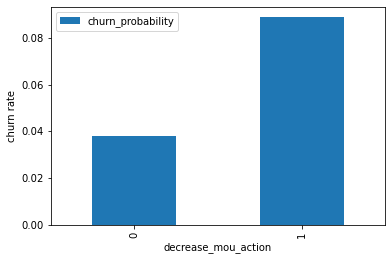

In [184]:
telecom.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

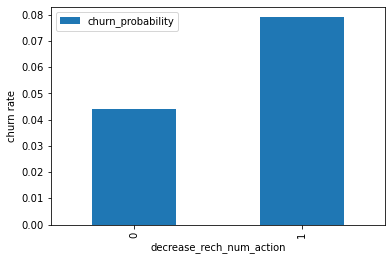

In [185]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

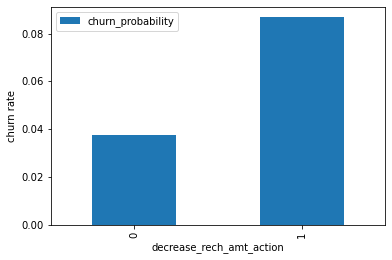

In [186]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate on the basis whether the customer decreased her/his volume based cost in action month

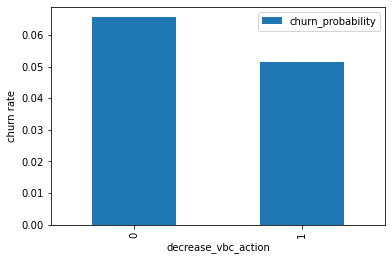

In [187]:
telecom.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [188]:
# Creating churn dataframe
data_churn = telecom[telecom['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = telecom[telecom['churn_probability'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

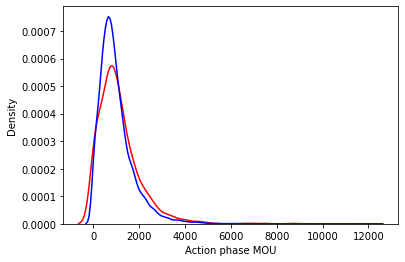

In [189]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False, color='red')
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False,  color='blue')
ax.set(xlabel='Action phase MOU')

#### Analysis
•	We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

•	The churn rate is more for the customers, whose number of recharges in the action phase is lesser than the number in good phase.

•	The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

•	The churn rate is more for the customers, whose volume-based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

•	Minutes of usage (MOU) of the churn customers is mostly populated on the 0 to 2000 range. Higher the MOU, lesser the churn probability.


### Bivariate analysis
Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

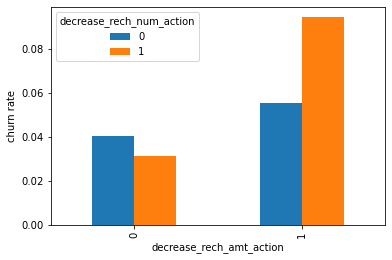

In [190]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

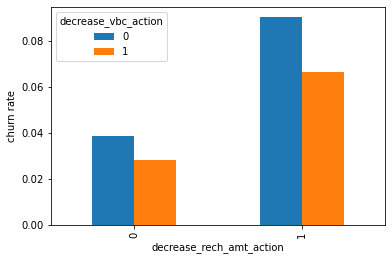

In [191]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

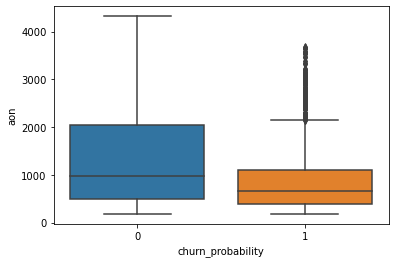

In [200]:
sns.boxplot(x = 'churn_probability', y ='aon', data = telecom)

#### Analysis 
•	We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

•	Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.


### Dropping all the derived columns, which are not required in further analysis

In [ ]:
telecom = telecom.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

In [213]:
telecom = telecom.drop(['decrease_mou_action','decrease_rech_num_action','decrease_rech_amt_action','decrease_arpu_action','decrease_vbc_action'], axis=1)

### Train and Test Data for Model Building

In [221]:
# Putting feature variables into X_train
X_train = telecom.drop(['churn_probability'], axis=1)

In [222]:
# Putting target variable to y_train
y_train = telecom['churn_probability']

In [226]:
X_test = test

In [223]:
X_train.shape

(20206, 134)

In [224]:
y_train.shape

(20206,)

### Feature Scaling

In [229]:
# Instantiate the Scaler
scaler = StandardScaler()
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [230]:
X_train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
12,-1.738122,0.0,0.0,0.0,-0.324433,-0.408832,-0.303643,-0.116179,-0.413889,-0.490740,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.985889,-0.331138,-0.328144,-0.305732
15,-1.737973,0.0,0.0,0.0,-0.006326,-0.452120,-0.409451,-0.623259,-0.584575,-0.172286,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.699321,-0.331138,-0.328144,-0.305732
23,-1.737576,0.0,0.0,0.0,1.238682,0.655039,-0.130890,1.216513,0.127751,-0.579242,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.849769,-0.331138,-0.328144,-0.305732
24,-1.737527,0.0,0.0,0.0,-0.478125,-0.504992,-0.602088,-0.443962,-0.557329,-0.518327,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.067846,-0.331138,-0.328144,-0.305732
25,-1.737477,0.0,0.0,0.0,-0.498535,-0.568515,0.282279,-0.226140,-0.380661,-0.165747,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,1.581971,-0.331138,-0.328144,-0.305732


We don't fit scaler on the test set. We only transform the test set.

In [231]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
1,1.733254,0.0,0.0,0.0,-0.382682,-0.162290,-0.364988,-0.482248,-0.551347,-0.539396,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,1.276980,-0.331138,-0.328144,-0.305732
2,1.733303,0.0,0.0,0.0,-0.573424,-0.331408,0.393793,-0.629521,-0.619667,-0.563451,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-1.031945,1.003681,1.541708,0.310684
4,1.733403,0.0,0.0,0.0,-0.625427,-0.391345,-0.261694,0.331186,0.611868,0.892205,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.842605,-0.331138,-0.328144,-0.305732
21,1.734246,0.0,0.0,0.0,-0.295746,-0.468628,-0.341996,1.771760,1.092072,0.868445,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-0.808831,-0.331138,-0.328144,-0.305732
23,1.734345,0.0,0.0,0.0,1.233076,0.571228,0.829070,0.204649,-0.093965,0.329418,...,-0.298667,-0.292861,-0.292294,-0.158482,-0.156144,-0.141958,-1.107681,-0.331138,-0.328144,-0.305732


## Model with PCA

In [233]:
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [234]:
# Principal components
pca.components_

array([[ 3.60568536e-03,  2.22044605e-16,  1.11022302e-16, ...,
         5.49173747e-02,  5.16882343e-02,  4.94478054e-02],
       [-1.70545240e-03, -2.77555756e-17,  1.66533454e-16, ...,
        -4.91229977e-02, -5.23982232e-02, -5.10428321e-02],
       [ 8.93172718e-04,  1.38777878e-16,  2.18575158e-16, ...,
         1.94175516e-01,  2.02181357e-01,  1.93291167e-01],
       ...,
       [-0.00000000e+00,  1.44234407e-01,  1.12269416e-01, ...,
        -3.46944695e-17, -6.41847686e-17,  1.20563282e-16],
       [-0.00000000e+00, -4.14977228e-01,  4.24429350e-01, ...,
        -6.93889390e-18, -4.16333634e-17,  8.32667268e-17],
       [-0.00000000e+00, -2.98296170e-01,  7.68876748e-02, ...,
        -0.00000000e+00,  7.63278329e-17, -1.66533454e-16]])

In [235]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09881182 0.18674045 0.24439654 0.29236543 0.33253986 0.36994683
 0.40215511 0.43033533 0.45683095 0.4817755  0.50530793 0.52744876
 0.54911857 0.57034886 0.59117169 0.6104207  0.62739395 0.64406102
 0.65853701 0.67230001 0.68598936 0.6985472  0.71084442 0.72152456
 0.73193093 0.74182048 0.75145391 0.7609424  0.76999704 0.77803679
 0.78601519 0.79389788 0.80160531 0.80920583 0.81627302 0.82316681
 0.82979835 0.8363648  0.84278965 0.84905539 0.85516846 0.86089072
 0.86652853 0.87196275 0.87694271 0.88185874 0.88665479 0.89118785
 0.89546622 0.89954822 0.90342321 0.90716062 0.91085717 0.91451347
 0.91801676 0.92144202 0.92479633 0.92803891 0.93121646 0.93421887
 0.93718878 0.93999158 0.94268453 0.94530536 0.94790262 0.95043639
 0.9529142  0.95532399 0.95761443 0.95985248 0.96203537 0.96415947
 0.9662709  0.96824359 0.97020035 0.97208105 0.97387597 0.975652
 0.97738102 0.97906365 0.9807398  0.98232619 0.98388996 0.98543737
 0.98693908 0.98841115 0.98986223 0.99121159 0.99252829 0.993690

Text(0, 0.5, 'Cumulative Variance')

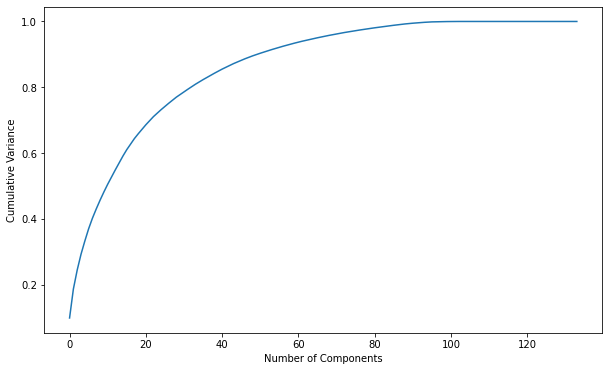

In [236]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can say that 60 components explain almost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [238]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

#### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [239]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to retain the customers, who have the possiblity to churn. 

There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic Regression with PCA

In [244]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [245]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137632,0.012100,0.005585,0.000799,0.01,{'C': 0.01},0.079295,0.057554,0.064151,0.082397,...,0.072427,0.009758,6,0.085526,0.074038,0.087719,0.060547,0.068467,0.075259,0.010245
1,0.212630,0.015038,0.004593,0.001019,0.1,{'C': 0.1},0.092511,0.075540,0.079245,0.097378,...,0.087832,0.008743,4,0.108083,0.098717,0.107212,0.079102,0.089682,0.096559,0.010982
2,0.311774,0.020074,0.003987,0.000892,1,{'C': 1},0.092511,0.075540,0.083019,0.101124,...,0.089336,0.009009,1,0.109023,0.100691,0.107212,0.083984,0.088717,0.097926,0.009962
3,0.313349,0.013665,0.004792,0.001164,10,{'C': 10},0.088106,0.075540,0.083019,0.104869,...,0.089204,0.009995,3,0.107143,0.102665,0.106238,0.083008,0.089682,0.097747,0.009663
4,0.350856,0.031182,0.004985,0.000631,100,{'C': 100},0.083700,0.075540,0.083019,0.101124,...,0.087574,0.009077,5,0.103383,0.102665,0.106238,0.083008,0.087753,0.096610,0.009367
5,0.300198,0.031760,0.003788,0.000977,1000,{'C': 1000},0.092511,0.075540,0.083019,0.101124,...,0.089336,0.009009,1,0.103383,0.102665,0.106238,0.083008,0.087753,0.096610,0.009367


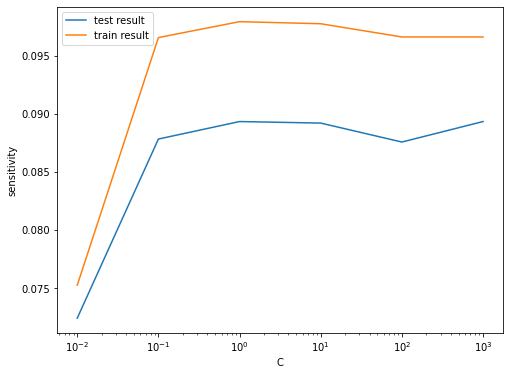

In [246]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [247]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.08933624679354141 at C = 1


In [248]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [249]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18798   117]
 [ 1166   125]]


In [250]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [256]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.936504008710284
Sensitivity:- 0.09682416731216112
Specificity:- 0.9938144329896907


In [253]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)


We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Decision tree with PCA

Hyperparameter Tuning

In [262]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [263]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.958038,0.036607,0.005143,1.398539e-03,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.073359,0.104651,0.108527,0.034884,0.027132,0.069711,0.033961,5
1,0.925737,0.010278,0.004189,3.977068e-04,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.073359,0.104651,0.108527,0.034884,0.027132,0.069711,0.033961,5
2,0.944879,0.065762,0.003592,4.896340e-04,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.073359,0.104651,0.081395,0.096899,0.000000,0.071261,0.037303,3
3,0.913949,0.004030,0.003603,5.001028e-04,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.073359,0.104651,0.081395,0.096899,0.000000,0.071261,0.037303,3
4,1.560422,0.020146,0.004394,1.029255e-03,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.057915,0.108527,0.116279,0.139535,0.124031,0.109257,0.027644,1
5,1.534700,0.012223,0.003990,4.862804e-07,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.057915,0.108527,0.116279,0.139535,0.124031,0.109257,0.027644,1
6,1.441945,0.028326,0.003987,2.259826e-06,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.073359,0.065891,0.081395,0.054264,0.050388,0.065059,0.011561,7
7,1.486624,0.041261,0.004188,3.981120e-04,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.073359,0.065891,0.081395,0.054264,0.050388,0.065059,0.011561,7


In [264]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.10925743018766274
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [265]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [266]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [267]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18780   135]
 [ 1074   217]]


In [268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [269]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9401662872414135
Sensitivity:- 0.1680867544539117
Specificity:- 0.992862807295797


In [270]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random Forest with PCA

In [272]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [273]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9361080912922826 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [274]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [275]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [276]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [277]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18915     0]
 [ 1291     0]]


In [278]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [279]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9361080867069187
Sensitivity:- 0.0
Specificity:- 1.0


## Without PCA
#### Logistic regression with No PCA

In [280]:
##### Importing stats model
import statsmodels.api as sm

In [281]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [282]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [283]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20206
Model:                            GLM   Df Residuals:                    20080
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3369.1
Date:                Wed, 10 Aug 2022   Deviance:                       6738.2
Time:                        14:53:22   Pearson chi2:                 7.35e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1772      0.100    -41.936      0.000      -4.372      -3.982
id                    -0.0401      0.033     -1.222      0.222      -0.104       0.024
loc_og_t2o_mou      -7.05e-08   9.16e-08     -0.770      0.441    -2.5e-07    1.09e-07
std_og_t2o_mou      9.031e-09   1.28e-07      0.070      0.944   -2.42e-07     2.6e-07
loc_ic_t2o_mou     -1.072e-07    6.1e-08     -1.756      0.079   -2.27e-07    1.25e-08
arpu_6                 0.0756      0.128      0.591      0.555      -0.175       0.326
arpu_7                 0.4335      0.159      2.733      0.006       0.123       0.744
arpu_8                 0.4964      0.177      2.809      0.005       0.150       0.843
onnet_mou_6           -1.8641      2.706     -0.689      0.491      -7.167       3.439
onnet_mou_7            1.8903      2.070      0.913      0.361      -2.166       5.947
onnet_mou_8           -3.9768      2.447     -1.625      0.104      -8.773       0.820
offnet_mou_6          -1.6200      2.692     -0.602      0.547      -6.895       3.655
offnet_mou_7           1.4251      1.972      0.722      0.470      -2.441       5.291
offnet_mou_8          -4.2467      2.402     -1.768      0.077      -8.955       0.462
roam_ic_mou_6          0.0555      0.037      1.516      0.129      -0.016       0.127
roam_ic_mou_7          0.0132      0.040      0.330      0.741      -0.065       0.092
roam_ic_mou_8         -0.0217      0.035     -0.624      0.533      -0.090       0.047
roam_og_mou_6          0.5048      0.706      0.715      0.475      -0.880       1.889
roam_og_mou_7         -0.2316      0.414     -0.560      0.576      -1.043       0.580
roam_og_mou_8          1.0199      0.554      1.841      0.066      -0.066       2.106
loc_og_t2t_mou_6   -1104.6493   1441.794     -0.766      0.444   -3930.513    1721.215
loc_og_t2t_mou_7     -56.2571   1521.399     -0.037      0.971   -3038.144    2925.630
loc_og_t2t_mou_8    4711.2801   1595.847      2.952      0.003    1583.477    7839.083
loc_og_t2m_mou_6   -1147.5805   1497.398     -0.766      0.443   -4082.427    1787.266
loc_og_t2m_mou_7     -51.9232   1410.353     -0.037      0.971   -2816.164    2712.317
loc_og_t2m_mou_8    4456.9764   1509.690      2.952      0.003    1498.038    7415.915
loc_og_t2f_mou_6     -97.0617    126.714     -0.766      0.444    -345.416     151.293
loc_og_t2f_mou_7      -4.8681    128.795     -0.038      0.970    -257.301     247.565
loc_og_t2f_mou_8     388.3404    131.507      2.953      0.003     130.592     646.088
loc_og_t2c_mou_6       0.0082      0.034      0.241      0.809      -0.059       0.075
loc_og_t2c_mou_7      -0.0035      0.040     -0.089      0.929      -0.081       0.074
loc_og_t2c_mou_8       0.0361      0.046      0.781      0.435      -0.054       0.127
loc_og_mou_6       -1521.0884   2813.7

##### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.
##### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [284]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

RFE with 15 columns

In [285]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [286]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'loc_og_t2m_mou_8', 'og_others_7', 'og_others_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8'],
      dtype='object')


#### Model-1 with RFE selected columns

In [287]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20206
Model:                            GLM   Df Residuals:                    20190
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3621.1
Date:                Wed, 10 Aug 2022   Deviance:                       7242.2
Time:                        15:38:04   Pearson chi2:                 2.08e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3116      0.105    -41.174      0.000      -4.517      -4.106
arpu_7                 0.5269      0.050     10.608      0.000       0.430       0.624
loc_og_t2m_mou_8      -0.7660      0.113     -6.802      0.000      -0.987      -0.545
og_others_7           -2.1020      2.391     -0.879      0.379      -6.789       2.585
og_others_8           -2.6392      2.892     -0.913      0.361      -8.308       3.029
loc_ic_t2f_mou_8      -0.2776      0.142     -1.959      0.050      -0.555    6.89e-05
loc_ic_mou_8          -1.4154      0.282     -5.016      0.000      -1.968      -0.862
std_ic_mou_8          -0.4119      0.145     -2.843      0.004      -0.696      -0.128
total_ic_mou_7         0.6136      0.063      9.684      0.000       0.489       0.738
total_ic_mou_8        -0.7257      0.290     -2.500      0.012      -1.295      -0.157
spl_ic_mou_8          -0.5481      0.086     -6.340      0.000      -0.718      -0.379
total_rech_num_8      -0.3862      0.048     -8.032      0.000      -0.480      -0.292
total_rech_amt_8      -0.4981      0.057     -8.790      0.000      -0.609      -0.387
last_day_rch_amt_8    -0.4162      0.063     -6.597      0.000      -0.540      -0.293
monthly_2g_8          -0.5507      0.079     -6.990      0.000      -0.705      -0.396
monthly_3g_8          -0.4719      0.078     -6.042      0.000      -0.625      -0.319
======================================================================================
"""

Checking for VIF

In [288]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [289]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,24.30
5,loc_ic_mou_8,18.24
6,std_ic_mou_8,4.45
11,total_rech_amt_8,3.41
7,total_ic_mou_7,3.11
0,arpu_7,2.63
1,loc_og_t2m_mou_8,1.35
12,last_day_rch_amt_8,1.33
10,total_rech_num_8,1.32
4,loc_ic_t2f_mou_8,1.16


Removing column og_others_7, which is insignificatnt as it has the highest p-value 0.371

In [290]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_7')
print(log_cols)

['arpu_7', 'loc_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8']


### Model-2
Building the model after removing og_others_7 variable.

In [291]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20206
Model:                            GLM   Df Residuals:                    20191
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3622.0
Date:                Wed, 10 Aug 2022   Deviance:                       7244.0
Time:                        15:41:37   Pearson chi2:                 2.08e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2798      0.095    -45.004      0.000      -4.466      -4.093
arpu_7                 0.5264      0.050     10.602      0.000       0.429       0.624
loc_og_t2m_mou_8      -0.7696      0.113     -6.826      0.000      -0.991      -0.549
og_others_8           -2.9830      2.905     -1.027      0.305      -8.677       2.711
loc_ic_t2f_mou_8      -0.2820      0.142     -1.986      0.047      -0.560      -0.004
loc_ic_mou_8          -1.4163      0.282     -5.020      0.000      -1.969      -0.863
std_ic_mou_8          -0.4120      0.145     -2.846      0.004      -0.696      -0.128
total_ic_mou_7         0.6098      0.063      9.673      0.000       0.486       0.733
total_ic_mou_8        -0.7200      0.290     -2.482      0.013      -1.289      -0.151
spl_ic_mou_8          -0.5481      0.086     -6.343      0.000      -0.718      -0.379
total_rech_num_8      -0.3863      0.048     -8.037      0.000      -0.481      -0.292
total_rech_amt_8      -0.4976      0.057     -8.783      0.000      -0.609      -0.387
last_day_rch_amt_8    -0.4157      0.063     -6.591      0.000      -0.539      -0.292
monthly_2g_8          -0.5520      0.079     -7.006      0.000      -0.706      -0.398
monthly_3g_8          -0.4720      0.078     -6.043      0.000      -0.625      -0.319
======================================================================================
"""

In [292]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_ic_mou_8,24.30
4,loc_ic_mou_8,18.24
5,std_ic_mou_8,4.45
10,total_rech_amt_8,3.41
6,total_ic_mou_7,3.11
0,arpu_7,2.63
1,loc_og_t2m_mou_8,1.35
11,last_day_rch_amt_8,1.33
9,total_rech_num_8,1.32
3,loc_ic_t2f_mou_8,1.16


As we can see from the model summary that all the variables p-values are significant and 	total_ic_mou_8 column has the highest VIF 24.30. Hence, deleting 	total_ic_mou_8 column.

In [293]:
# Removing total_ic_mou_8 column
log_cols.remove('total_ic_mou_8')

### Model-3
Model after removing total_ic_mou_8 column.

In [294]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20206
Model:                            GLM   Df Residuals:                    20192
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3626.7
Date:                Wed, 10 Aug 2022   Deviance:                       7253.3
Time:                        15:44:06   Pearson chi2:                 2.24e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2789      0.095    -44.841      0.000      -4.466      -4.092
arpu_7                 0.5400      0.049     10.981      0.000       0.444       0.636
loc_og_t2m_mou_8      -0.7820      0.113     -6.912      0.000      -1.004      -0.560
og_others_8           -3.0776      2.940     -1.047      0.295      -8.839       2.684
loc_ic_t2f_mou_8      -0.2920      0.143     -2.049      0.040      -0.571      -0.013
loc_ic_mou_8          -1.9714      0.157    -12.557      0.000      -2.279      -1.664
std_ic_mou_8          -0.6721      0.097     -6.956      0.000      -0.862      -0.483
total_ic_mou_7         0.5463      0.058      9.416      0.000       0.433       0.660
spl_ic_mou_8          -0.5538      0.087     -6.400      0.000      -0.723      -0.384
total_rech_num_8      -0.3851      0.048     -8.023      0.000      -0.479      -0.291
total_rech_amt_8      -0.5262      0.056     -9.459      0.000      -0.635      -0.417
last_day_rch_amt_8    -0.4169      0.063     -6.635      0.000      -0.540      -0.294
monthly_2g_8          -0.5517      0.079     -7.022      0.000      -0.706      -0.398
monthly_3g_8          -0.4780      0.078     -6.090      0.000      -0.632      -0.324
======================================================================================
"""

In [295]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,3.38
4,loc_ic_mou_8,2.88
6,total_ic_mou_7,2.87
0,arpu_7,2.62
1,loc_og_t2m_mou_8,1.35
10,last_day_rch_amt_8,1.33
8,total_rech_num_8,1.32
5,std_ic_mou_8,1.30
3,loc_ic_t2f_mou_8,1.16
12,monthly_3g_8,1.08


Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.295

In [296]:
# Removing og_others_8 column
log_cols.remove('og_others_8')

### Model-4
Model after removing og_others_8 column.

In [297]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20206
Model:                            GLM   Df Residuals:                    20193
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3630.2
Date:                Wed, 10 Aug 2022   Deviance:                       7260.4
Time:                        15:47:48   Pearson chi2:                 2.38e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2227      0.078    -54.176      0.000      -4.375      -4.070
arpu_7                 0.5325      0.049     10.824      0.000       0.436       0.629
loc_og_t2m_mou_8      -0.7832      0.113     -6.918      0.000      -1.005      -0.561
loc_ic_t2f_mou_8      -0.2941      0.143     -2.061      0.039      -0.574      -0.014
loc_ic_mou_8          -1.9626      0.157    -12.513      0.000      -2.270      -1.655
std_ic_mou_8          -0.6684      0.096     -6.927      0.000      -0.857      -0.479
total_ic_mou_7         0.5400      0.058      9.335      0.000       0.427       0.653
spl_ic_mou_8          -0.5538      0.087     -6.399      0.000      -0.723      -0.384
total_rech_num_8      -0.3893      0.048     -8.096      0.000      -0.484      -0.295
total_rech_amt_8      -0.5209      0.056     -9.354      0.000      -0.630      -0.412
last_day_rch_amt_8    -0.4238      0.063     -6.695      0.000      -0.548      -0.300
monthly_2g_8          -0.5511      0.079     -7.019      0.000      -0.705      -0.397
monthly_3g_8          -0.4766      0.078     -6.074      0.000      -0.630      -0.323
======================================================================================
"""

In [298]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_rech_amt_8,3.38
3,loc_ic_mou_8,2.88
5,total_ic_mou_7,2.87
0,arpu_7,2.62
1,loc_og_t2m_mou_8,1.35
9,last_day_rch_amt_8,1.33
7,total_rech_num_8,1.32
4,std_ic_mou_8,1.30
2,loc_ic_t2f_mou_8,1.16
11,monthly_3g_8,1.08


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-4 log_no_pca_4 will be the final model.

### Model performance on the train set

In [299]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

12    0.105548
15    0.000633
23    0.041165
24    0.057157
25    0.005477
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities

In [300]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.105548,0
1,0,0.000633,1
2,0,0.041165,2
3,0,0.057157,3
4,0,0.005477,4


In [301]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105548,0,1,1,0,0,0,0,0,0,0,0
1,0,0.000633,1,1,0,0,0,0,0,0,0,0,0
2,0,0.041165,2,1,0,0,0,0,0,0,0,0,0
3,0,0.057157,3,1,0,0,0,0,0,0,0,0,0
4,0,0.005477,4,1,0,0,0,0,0,0,0,0,0


In [302]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.063892     1.000000     0.000000
0.1          0.1  0.823122     0.750581     0.828073
0.2          0.2  0.919281     0.546863     0.944700
0.3          0.3  0.933436     0.293571     0.977108
0.4          0.4  0.935019     0.103796     0.991753
0.5          0.5  0.935811     0.045701     0.996564
0.6          0.6  0.936257     0.024012     0.998520
0.7          0.7  0.935811     0.007746     0.999154
0.8          0.8  0.936009     0.003873     0.999630
0.9          0.9  0.936207     0.002324     0.999947


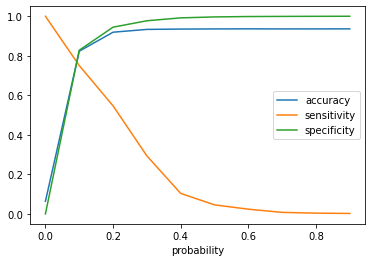

In [303]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [304]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.105548,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000633,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.041165,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.057157,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.005477,4,1,0,0,0,0,0,0,0,0,0,0


In [305]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18850    65]
 [ 1232    59]]


In [306]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [307]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9358111452043947
Sensitivity:- 0.045701006971340045
Specificity:- 0.9965635738831615


In [308]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

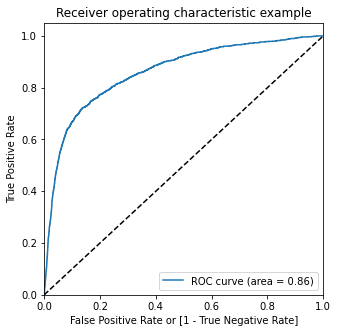

In [309]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [310]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [311]:
# Taking a copy of the test set
X_test_log = X_test.copy()
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [312]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [314]:
# Predict on the test set
y_test_pred = log_no_pca_4.predict(X_test_sm)

In [315]:
y_test_pred.head()

1     0.039393
2     0.152355
4     0.070725
21    0.130547
23    0.000003
dtype: float64

In [316]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1,0.039393
2,0.152355
4,0.070725
21,0.130547
23,0.000003


In [323]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_pred_1.rename(columns={0:'churn_prob'})

In [324]:
y_test_pred_final.head()

,churn_prob
1,0.039393
2,0.152355
4,0.070725
21,0.130547
23,0.000003


In [325]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [328]:
y_test_pred_final.head()

,churn_prob,test_predicted
1,0.039393,0
2,0.152355,0
4,0.070725,0
21,0.130547,0
23,0.000003,0


In [329]:
y_test_pred_final.to_csv("C:\\Users\\DELL\\Desktop\\TelecomChurnCaseStudy\\Submission.csv")

## Business recomendation
#### Top predictors
Below are few top variables selected in the logistic regression model.



const	               -4.2227	
arpu_7              	0.5325	
loc_og_t2m_mou_8       -0.7832	
loc_ic_t2f_mou_8	   -0.2941	
loc_ic_mou_8	       -1.9626	
std_ic_mou_8	       -0.6684
total_ic_mou_7	        0.5400
spl_ic_mou_8	       -0.5538
total_rech_num_8	   -0.3893
total_rech_amt_8	   -0.5209	
last_day_rch_amt_8	   -0.4238
monthly_2g_8	       -0.5511
monthly_3g_8	       -0.4766


We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_og_t2m_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

Recomendations

	Target the customers, whose minutes of usage of the incoming local calls and outgoing calls are less in the action phase (mostly in the month of August).

	Also, the customers having value-based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

	Customers decreasing monthly 3g usage for August are most probable to churn.

	Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.

	Customers decreasing monthly 2g usage for August are most probable to churn.
